In [4]:
import numpy as np
import matplotlib.pyplot as plt

Process data into plot-able form:

In [5]:
# Sorry this code is gross I put it together rly hastily :<

# Splits data into readable hex values
def ProcessData(input, dataLength):
  # RSSI  lastencoderDigit,ID   first&secondencoderdigit
  input = input.replace(" -", "")
  input = input.replace("  ", " ")
  dataInputArray = input.split(" ")
  # Iterate through list and pop any entries with length != 2
  new_list = [x for x in dataInputArray if len(x)<=2]
  return np.reshape(new_list,(-1,dataLength))

# Splits hex values into a 2D array of 3 arrays, each containing the RSSI of a particular transmitter
def GetRSSIofTransmitters(input, transmitters):
  transmitters = [10,11,12]
  RSSItoPlot = [[],[],[]]
  for x in range(len(transmitters)):
    for data in input:
      if int(data[1], 16) % 16 == transmitters[x]:
        RSSItoPlot[x].append(int(data[0],16))
  return RSSItoPlot

# Example Usage

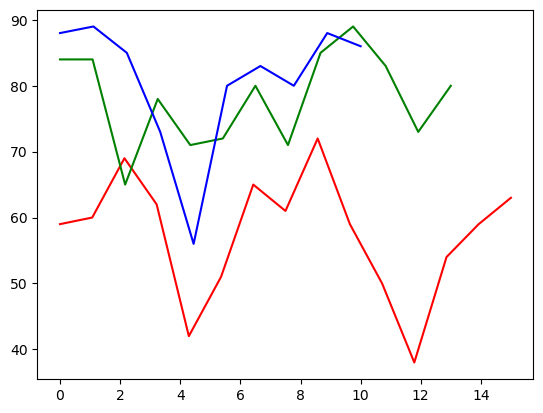

In [6]:
# Raw data... should read from a file rly
dataInput = """0x07FC53A4  54 5B 11 3B 6A 14 3C 3A - 15 58 2C 04 54 AB 12 45 T[.;j.<:.X,.T..E
0x07FC53B4  EA 15 3E 1A 00 41 5B 13 - 4E EB 13 59 5C 06 47 3B ..>..A[.N..Y\.G;
0x07FC53C4  14 55 BC 06 2A 3A 01 49 - CC 06 48 3B 14 33 3A 01 .U..*:.I..H;.3:.
0x07FC53D4  38 CC 06 50 3B 14 50 CC - 06 47 3B 14 53 0C 07 55 8..P;.P..G;.S..U
0x07FC53E4  4B 14 41 6A 01 59 CB 14 - 50 8C 07 58 4C 08 3D 2A K.Aj.Y..P..XL.=*
0x07FC53F4  03 56 AC 09 48 BA 04 53 - BB 00 49 3B 01 3B 4A 05 .V..H..S..I;.;J.
0x07FC5404  32 AA 05 26 AA 05 36 AA - 05 50 9B 01 3B AA 05 3F 2..&..6..P..;..?
0x07FC5414  CA 05"""

rssiData = GetRSSIofTransmitters(ProcessData(dataInput, 3),[10,11,12]) # Returns 2D array of RSSI for each transmitter [[transmitter A], [transmitter B], [transmitter C]]
plt.plot(np.linspace(0,len(rssiData[0]),len(rssiData[0])), rssiData[0],color="red") # RSSI from transmitter A
plt.plot(np.linspace(0,len(rssiData[1]),len(rssiData[1])), rssiData[1],color="green") # RSSI from transmitter B
plt.plot(np.linspace(0,len(rssiData[2]),len(rssiData[2])), rssiData[2],color="blue") # RSSI from transmitter C

# Initial Test of Rotating Radar 19/01/2024

to do...

# Range finding & noise variance measurement w/ Euan 25/01/2024

Radar was stationary at 0m

![](https://drive.google.com/uc?export=view&id=1iNA6PVZcoXs0x4rC5tU9p8GByMPnJC_g)